# Prediction of COVID-19 around the world

Student: Angela Amador

TMU Student Number: 500259095

Supervisor: Tamer Abdou, PhD


I aim to demonstrate how Machine Learning (ML) models were able to predict the spread of COVID-19 around the world.

First, I will explore the dataset to get insides and better understand patterns, detect error and outliers, and find relationships between variables. 


## Preparation
This dataset is taken from Our World in Data website, officially collected by Our World in Data team: https://covid.ourworldindata.org/data/owid-covid-data.csv.

This dataset will be synced daily. For more info: https://www.kaggle.com/datasets/caesarmario/our-world-in-data-covid19-dataset

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import statsmodels.api as sm


from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from ydata_profiling import ProfileReport
from IPython.core.interactiveshell import InteractiveShell
from numpy import unique

warnings.filterwarnings("ignore")
InteractiveShell.ast_node_interactivity = "all"


### Load file and explore data

The dataset, provided by Our World in Data, provides COVID-19 information collected by Our World in Data available to Kaggle community https://www.kaggle.com/datasets/caesarmario/our-world-in-data-covid19-dataset/download?datasetVersionNumber=418. This dataset is updated daily, for the purpose of this study I am analyzing the data with information up to Oct 7th, 2023.

In [2]:
# Load file
raw_data = pd.read_csv('archive.zip', sep=',')  

#Explore data
raw_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


### Check the data type and metadata of the attributes

In [3]:
raw_data.dtypes

iso_code                                    object
continent                                   object
location                                    object
date                                        object
total_cases                                float64
                                            ...   
population                                 float64
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
Length: 67, dtype: object

In [4]:
# look at meta information about data, such as null values
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346567 entries, 0 to 346566
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    346567 non-null  object 
 1   continent                                   330089 non-null  object 
 2   location                                    346567 non-null  object 
 3   date                                        346567 non-null  object 
 4   total_cases                                 308672 non-null  float64
 5   new_cases                                   337028 non-null  float64
 6   new_cases_smoothed                          335769 non-null  float64
 7   total_deaths                                287169 non-null  float64
 8   new_deaths                                  337072 non-null  float64
 9   new_deaths_smoothed                         335842 non-null  float64
 

In [5]:
# Let's see meta information about numeric data, we can also see if there any extreme values
raw_data.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,3.086720e+05,3.370280e+05,3.357690e+05,2.871690e+05,337072.000000,335842.000000,308672.000000,337028.000000,335769.000000,287169.000000,...,198833.000000,131627.000000,237221.000000,318823.000000,260466.000000,3.465670e+05,1.195300e+04,11953.000000,11953.000000,11953.000000
mean,6.609069e+06,9.695906e+03,9.732069e+03,8.559525e+04,86.392889,86.704207,100634.394008,146.569024,147.113196,867.354640,...,32.909864,50.789455,3.097109,73.714185,0.722460,1.283225e+08,5.113535e+04,9.739424,11.461129,1646.844959
std,4.032547e+07,1.108324e+05,9.495414e+04,4.380493e+05,616.815791,561.926045,150292.226515,1169.506821,602.840371,1096.750172,...,13.574185,31.956355,2.548353,7.395560,0.148979,6.603117e+08,1.442796e+05,12.380781,25.354695,1929.159161
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.700000,1.188000,0.100000,53.280000,0.394000,4.700000e+01,-3.772610e+04,-44.230000,-95.920000,-2752.924800
25%,7.988750e+03,0.000000e+00,2.860000e-01,1.250000e+02,0.000000,0.000000,2573.783500,0.000000,0.056000,59.672000,...,22.600000,20.859000,1.300000,69.590000,0.602000,4.490020e+05,1.066000e+02,1.320000,-1.620000,65.345720
50%,6.904700e+04,2.000000e+00,2.585700e+01,1.313000e+03,0.000000,0.143000,27720.494000,0.169000,6.815000,374.322000,...,33.100000,49.839000,2.500000,75.050000,0.740000,5.882259e+06,5.736601e+03,8.070000,5.770000,1072.472700
75%,7.345502e+05,2.730000e+02,5.107140e+02,1.181800e+04,3.000000,5.286000,131483.602000,36.566000,84.076000,1356.019000,...,41.300000,82.502000,4.200000,79.460000,0.829000,2.830170e+07,3.668959e+04,15.470000,16.520000,2704.933800
max,7.711505e+08,8.401961e+06,6.402036e+06,6.960770e+06,27939.000000,14821.857000,737554.506000,228872.025000,37241.781000,6511.209000,...,78.100000,100.000000,13.800000,86.750000,0.957000,7.975105e+09,1.289776e+06,76.550000,377.630000,10292.916000


In [6]:
print("Original dataset:")
print("Total number of observations: ", raw_data.shape[0])
print("Total number of attributes: ", raw_data.shape[1])
print("Size: ", raw_data.size)

Original dataset:
Total number of observations:  346567
Total number of attributes:  67
Size:  23219989


### Removing observation with NaN Total Cases which is our predictor variable

The dataset has a total of 37,895 observations with empty total_cases


In [7]:
raw_data = raw_data.drop(raw_data[raw_data['total_cases'].isna()].index)

print("After removing observations with NaN Total Cases:")
print("Total number of observations: ", raw_data.shape[0])
print("Total number of attributes: ", raw_data.shape[1])
print("Size: ", raw_data.size)

After removing observations with NaN Total Cases:
Total number of observations:  308672
Total number of attributes:  67
Size:  20681024


### Removing data before COVID vaccine availability

Multiple vaccinates became available on the second semester of 2020. By December most countries have approved vaccinates for their own country. 

Vaccinations changed the behaviour of the pandemic then I will remove data before Jan 1st, 2021 to consider data only after vaccines became availability

In [8]:
post_vaccine_data = raw_data.drop(raw_data[raw_data.date < '2021-01-01'].index)

print("\nAfter removing data before vaccinate was available around the world (Jan 1st, 2021):")
print("Total number of observations: ", post_vaccine_data.shape[0])
print("Total number of attributes: ", post_vaccine_data.shape[1])
print("Size: ", post_vaccine_data.size)



After removing data before vaccinate was available around the world (Jan 1st, 2021):
Total number of observations:  240213
Total number of attributes:  67
Size:  16094271


### Data Splitting
One of the first decisions to make is how to utilize the existing data. One common technique is to split the data into two groups typically referred to as the training and testing sets. The training set is used to develop
models and feature sets; it is the substrate for estimating parameters, comparing models, and all of the other activities required to reach a final model. The test set is used only at the conclusion of these activities for estimating a final, unbiased assessment of the model’s performance. It is critical that the test set not be used prior to this point. Looking at the test set results would bias the outcomes since the testing data will have become part of the model development process. Reference: Feature Engineering and Selection A Practical Approach for Predictive Models

In [9]:
# Find out the index of total_cases column
c = post_vaccine_data.columns.get_loc('total_cases')

# Find out number of columns
d = post_vaccine_data.shape[1]

# Build feature, target arrays
X, y = post_vaccine_data.iloc[:, [i for i in range(d) if i != c]], post_vaccine_data.iloc[:, [c]]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1121218)

print("\nX_train dataset:")
print("Total number of observations: ", X_train.shape[0])
print("Total number of attributes: ", X_train.shape[1])
print("Size: ", X_train.size)

print("\nX_train dataset:")
print("Total number of observations: ", y_train.shape[0])
print("Total number of attributes: ", y_train.shape[1])
print("Size: ", y_train.size)

print("\nX_train dataset:")
print("Total number of observations: ", X_test.shape[0])
print("Total number of attributes: ", X_test.shape[1])
print("Size: ", X_test.size)

print("\nX_train dataset:")
print("Total number of observations: ", y_test.shape[0])
print("Total number of attributes: ", y_test.shape[1])
print("Size: ", y_test.size)


X_train dataset:
Total number of observations:  168149
Total number of attributes:  66
Size:  11097834

X_train dataset:
Total number of observations:  168149
Total number of attributes:  1
Size:  168149

X_train dataset:
Total number of observations:  72064
Total number of attributes:  66
Size:  4756224

X_train dataset:
Total number of observations:  72064
Total number of attributes:  1
Size:  72064


## Data Cleaning

### Identify Columns That Contain a Single Value
The dataset doesn't have columns with a single value

In [10]:
# get number of unique values for each column
counts = X_train.nunique()

# record columns to delete
to_del = [i for i,v in enumerate(counts) if v == 1]
print(to_del)

# drop useless columns
X_train.drop(to_del, axis=1, inplace=True)
print(X_train.shape)


[]
(168149, 66)


### Consider Columns That Have Very Few Values
Even though we have 23 columns with less than 1% of unique values, most of them are numerical. In addition, some of the columns are categorical.

In [11]:
# record columns to delete, columns with unique values less than 1 percent of rows
counts
to_del = [i for i,v in enumerate(counts) if (float(v)/X_train.shape[0]*100) < 1]
print(to_del)

# drop useless columns
#X_train.drop(to_del, axis=1, inplace=True)
#print(X_train.shape)

iso_code                                     244
continent                                      6
location                                     244
date                                        1007
new_cases                                  18885
                                           ...  
population                                   244
excess_mortality_cumulative_absolute        5775
excess_mortality_cumulative                 2833
excess_mortality                            3503
excess_mortality_cumulative_per_million     5784
Length: 66, dtype: int64

[0, 1, 2, 3, 15, 20, 32, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]


### Removing data columns with too many NaN values

We can calculate the ratio of missing values using a simple formula. The formula is the number of missing values in each column divided by the total number of observation. Generally, we can drop variables having a missing value ratio of more than 60% or 70%. For my purpose I am going to use a threashold of 60% missing values and remove those attributes.

In [12]:
# Defining threashold of 60% missing values 
threashold_NaN = 0.60

#Explore data
def describe_nan(df):
    return pd.DataFrame([(i, df[df[i].isna()].shape[0],df[df[i].isna()].shape[0]/df.shape[0]) for i in df.columns], columns=['column', 'nan_counts', 'nan_rate'])

pd.options.display.max_rows = None

#icu=raw_data.icu_patients.value_counts(dropna=False)
#display ("NaN entries for the icu_patients column:", icu[icu.index.isnull()])

print("Attributes with more than 60 percentage of missing values:")

describe_nan(X_train).sort_values(by="nan_rate", ascending=False).query("nan_rate >= %s"%threashold_NaN)

#((raw_data.isnull() | raw_data.isna()).sum() * 100 / raw_data.index.size).round(2)

Attributes with more than 60 percentage of missing values:


,column,nan_counts,nan_rate
65,excess_mortality_cumulative_per_million,162342,0.965465
64,excess_mortality,162342,0.965465
63,excess_mortality_cumulative,162342,0.965465
62,excess_mortality_cumulative_absolute,162342,0.965465
20,weekly_icu_admissions,162231,0.964805
21,weekly_icu_admissions_per_million,162231,0.964805
23,weekly_hosp_admissions_per_million,158121,0.940362
22,weekly_hosp_admissions,158121,0.940362
17,icu_patients_per_million,150189,0.893190
16,icu_patients,150189,0.893190


In [13]:
drop_columns_NaN = describe_nan(X_train).sort_values(by="nan_rate", ascending=False).query("nan_rate >= %s"%threashold_NaN)[["column"]]
drop_columns_NaN = drop_columns_NaN['column'].to_list() 

# Removing data columns with too many missing values
# drop_columns_NaN
X_train_NaN = X_train.drop(drop_columns_NaN, axis=1, inplace=False)

print("After removing columns with more than 60 percentage of missing values:\n")
print("Total number of observations: ", X_train_NaN.shape[0])
print("Total number of attributes: ", X_train_NaN.shape[1])
print("Size: ", X_train_NaN.size)
print("\n")
X_train_NaN.info()

After removing columns with more than 60 percentage of missing values:

Total number of observations:  168149
Total number of attributes:  35
Size:  5885215


<class 'pandas.core.frame.DataFrame'>
Index: 168149 entries, 150503 to 32276
Data columns (total 35 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    168149 non-null  object 
 1   continent                                   159699 non-null  object 
 2   location                                    168149 non-null  object 
 3   date                                        168149 non-null  object 
 4   new_cases                                   168015 non-null  float64
 5   new_cases_smoothed                          168015 non-null  float64
 6   total_deaths                                161662 non-null  float64
 7   new_deaths                                  168017 non-null 

In [14]:
print("Percentage of NaN values per attribute for the remaining columns:\n")
describe_nan(X_train_NaN).sort_values(by="nan_rate", ascending=False)

# del(dr1_data)

Percentage of NaN values per attribute for the remaining columns:



,column,nan_counts,nan_rate
26,extreme_poverty,80171,0.476785
20,stringency_index,78294,0.465623
15,reproduction_rate,72408,0.430618
30,male_smokers,66999,0.398450
29,female_smokers,65606,0.390166
17,new_vaccinations_smoothed_per_million,49795,0.296136
16,new_vaccinations_smoothed,49795,0.296136
19,new_people_vaccinated_smoothed_per_hundred,49790,0.296106
18,new_people_vaccinated_smoothed,49790,0.296106
31,hospital_beds_per_thousand,48576,0.288887


In [15]:
X_train_NaN.head()
y_train.head()

,iso_code,continent,location,date,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,population
150503,JAM,North America,Jamaica,2023-03-22,67.0,9.571,3528.0,7.0,1.000,54657.630,...,8193.571,NaN,206.537,11.28,5.3,28.6,1.70,74.47,0.734,2.827382e+06
188994,MTQ,North America,Martinique,2021-04-21,0.0,124.429,66.0,0.0,1.000,26551.514,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.54,NaN,3.675120e+05
96728,OWID_EUR,NaN,Europe,2022-04-03,2956560.0,646381.857,1819629.0,4750.0,1615.000,243286.033,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.448078e+08
132111,OWID_HIC,NaN,High income,2021-07-06,54690.0,79034.571,1617485.0,555.0,741.857,63677.243,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.250515e+09
137661,ISL,Europe,Iceland,2021-11-08,0.0,118.143,34.0,0.0,0.000,39039.643,...,46482.958,0.2,117.992,5.31,14.3,15.2,2.91,82.99,0.949,3.729030e+05


,total_cases
150503,154538.0
188994,9758.0
96728,181201336.0
132111,79629322.0
137661,14558.0


### Low Variance Filter

Another way of measuring how much information a data column has, is to measure its variance. In the limit case where the column cells assume a constant value, the variance would be 0 and the column would be of no help in the discrimination of different groups of data.

The Low Variance Filter node calculates each column variance and removes those columns with a variance value below a given threshold. Notice that the variance can only be calculated for numerical columns, i.e. this dimensionality reduction method applies only to numerical columns. Note, too, that the variance value depends on the column numerical range. Therefore data column ranges need to be normalized to make variance values independent from the column domain range.

In [16]:
# Initialization is just like any other Scikit-learn estimator. The default value for the threshold is always 0. 
# Also, the estimator only works with numeric data obviously and it will raise an error if there are categorical features present in the dataframe. 
# That’s why, for now, I will subset the numeric features into another dataframe:

vt = VarianceThreshold()

X_train_num = X_train_NaN.select_dtypes(include="number")
#X_train_num.shape
#X_train_num.info()


In [17]:
# Before, I need to take care of missing values encoded as NaN natively by replacing with the mean 

print ("Before replacing NaN values with the mean:\n")
print("Total number of observations: ", X_train_num.shape[0])
print("Total number of attributes: ", X_train_num.shape[1])
print("Size: ", X_train_num.size)
print("\n")
X_train_num.info()

for c in X_train_num.columns:
    X_train_num[c] = X_train_num[c].fillna(X_train_num[c].mean())

print ("\nAfter replacing NaN values with the mean:\n")
print("Total number of observations: ", X_train_num.shape[0])
print("Total number of attributes: ", X_train_num.shape[1])
print("Size: ", X_train_num.size)
print("\n")
X_train_num.info()

Before replacing NaN values with the mean:

Total number of observations:  168149
Total number of attributes:  31
Size:  5212619


<class 'pandas.core.frame.DataFrame'>
Index: 168149 entries, 150503 to 32276
Data columns (total 31 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   new_cases                                   168015 non-null  float64
 1   new_cases_smoothed                          168015 non-null  float64
 2   total_deaths                                161662 non-null  float64
 3   new_deaths                                  168017 non-null  float64
 4   new_deaths_smoothed                         168017 non-null  float64
 5   total_cases_per_million                     168149 non-null  float64
 6   new_cases_per_million                       168015 non-null  float64
 7   new_cases_smoothed_per_million              168015 non-null  float64
 8   total_deaths_p

>Threshold=0.00, Features=31
>Threshold=0.05, Features=29
>Threshold=0.10, Features=28
>Threshold=0.15, Features=28
>Threshold=0.20, Features=28
>Threshold=0.25, Features=28
>Threshold=0.30, Features=28
>Threshold=0.35, Features=28
>Threshold=0.40, Features=28
>Threshold=0.45, Features=28
>Threshold=0.50, Features=28
>Threshold=0.55, Features=28
>Threshold=0.60, Features=28
>Threshold=0.65, Features=28
>Threshold=0.70, Features=28
>Threshold=0.75, Features=28
>Threshold=0.80, Features=28
>Threshold=0.85, Features=28
>Threshold=0.90, Features=28
>Threshold=0.95, Features=28
>Threshold=1.00, Features=28


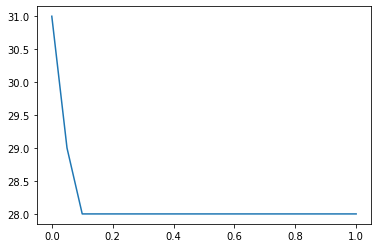

In [18]:
# Evaluating the effect of different variance thresholds.

# define thresholds to check
thresholds = np.arange(0.0, 1.05, 0.05)

# apply transform with each threshold
results = list()
for t in thresholds:
    # define the transform
    transform = VarianceThreshold(threshold=t)
    # transform the input data
    X_sel = transform.fit_transform(X_train_num)
    # determine the number of input features
    n_features = X_sel.shape[1]
    print('>Threshold=%.2f, Features=%d' % (t, n_features))
    # store the result
    results.append(n_features)
    #print(X_sel.dtype)

# plot the threshold vs the number of selected features
plt.plot(thresholds, results)
plt.show()


The line pot shows the relationship between the threshold and the number of features in the transformed dataset. I can see that with a small threshold of 0.10, 3 features are removed immediately.

In [19]:
# First, we fit the estimator to data and call its get_support() method. It returns a boolean mask with True values for columns which are not dropped. 
# We can then use this mask to subset our DataFrame like so

_ = vt.fit(X_train_num)
mask = vt.get_support()

X_train_num = X_train_num.loc[:, mask]

# Let’s drop features with variances close to 0
vt = VarianceThreshold(threshold=1)

# Fit
_ = vt.fit(X_train_num)

# # Get the boolean mask
mask = vt.get_support()

X_train_LowVariance = X_train_num.loc[:, mask]

print ("\nAfter dropping features with variances close to 0:\n")
print("Total number of observations: ", X_train_LowVariance.shape[0])
print("Total number of attributes: ", X_train_LowVariance.shape[1])
print("Size: ", X_train_LowVariance.size)
print("\n")
X_train_LowVariance.info()



After dropping features with variances close to 0:

Total number of observations:  168149
Total number of attributes:  28
Size:  4708172


<class 'pandas.core.frame.DataFrame'>
Index: 168149 entries, 150503 to 32276
Data columns (total 28 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   new_cases                              168149 non-null  float64
 1   new_cases_smoothed                     168149 non-null  float64
 2   total_deaths                           168149 non-null  float64
 3   new_deaths                             168149 non-null  float64
 4   new_deaths_smoothed                    168149 non-null  float64
 5   total_cases_per_million                168149 non-null  float64
 6   new_cases_per_million                  168149 non-null  float64
 7   new_cases_smoothed_per_million         168149 non-null  float64
 8   total_deaths_per_million               168149 non-null 

The attributes that were dropped are:
 - reproduction_rate
 - new_people_vaccinated_smoothed_per_hundred
 - human_development_index

#### Method of normalizing all features by dividing them by their mean

In [20]:
# Method of normalizing all features by dividing them by their mean

normalized_df = X_train_LowVariance / X_train_LowVariance.mean()
normalized_df.head()

print("Variance of the normalized dataset:\n")
normalized_df.var()

,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,population
150503,0.005559,0.000784,0.034631,0.081561,0.011501,0.426917,0.122803,0.017629,1.195671,2.480739,...,1.164111,0.438320,1.000000,0.786696,1.333934,0.499254,0.871915,0.565370,1.011032,0.020845
188994,0.000000,0.010197,0.000648,0.000000,0.011501,0.207387,0.000000,1.763253,0.172084,0.000000,...,2.285046,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.120594,0.002710
96728,245.319608,52.970809,17.861465,55.344995,18.573716,1.900248,20.571080,4.519719,2.341026,6.389206,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.491185
132111,4.537885,6.476861,15.877221,6.466626,8.531914,0.497367,0.226639,0.329152,1.239422,0.444850,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.219569
137661,0.000000,0.009682,0.000334,0.000000,0.000000,0.304929,0.000000,1.649975,0.087368,0.000000,...,1.677304,2.486636,0.014416,0.449430,0.627942,1.347045,0.463395,0.967781,1.126703,0.002749


Variance of the normalized dataset:



new_cases                                116.820790
new_cases_smoothed                        84.209544
total_deaths                              21.831489
new_deaths                                50.478200
new_deaths_smoothed                       42.709745
total_cases_per_million                    1.566082
new_cases_per_million                     59.102813
new_cases_smoothed_per_million            14.230405
total_deaths_per_million                   1.154105
new_deaths_per_million                    32.496046
new_deaths_smoothed_per_million            8.690622
new_vaccinations_smoothed                 28.511519
new_vaccinations_smoothed_per_million      1.872396
new_people_vaccinated_smoothed            34.614832
stringency_index                           0.170828
population_density                        18.324317
median_age                                 0.072375
aged_65_older                              0.390604
aged_70_older                              0.463001
gdp_per_capi

In [21]:
# Now, we can use the estimator with a lower threshold like 0.05
vt = VarianceThreshold(threshold=0.05)

# Fit
_ = vt.fit(normalized_df)

# # Get the boolean mask
mask = vt.get_support()

X_train_LowVariance_norm = X_train_LowVariance.loc[:, mask]

X_train_LowVariance_norm.shape

X_train_LowVariance_norm.info()

(168149, 27)

<class 'pandas.core.frame.DataFrame'>
Index: 168149 entries, 150503 to 32276
Data columns (total 27 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   new_cases                              168149 non-null  float64
 1   new_cases_smoothed                     168149 non-null  float64
 2   total_deaths                           168149 non-null  float64
 3   new_deaths                             168149 non-null  float64
 4   new_deaths_smoothed                    168149 non-null  float64
 5   total_cases_per_million                168149 non-null  float64
 6   new_cases_per_million                  168149 non-null  float64
 7   new_cases_smoothed_per_million         168149 non-null  float64
 8   total_deaths_per_million               168149 non-null  float64
 9   new_deaths_per_million                 168149 non-null  float64
 10  new_deaths_smoothed_per_million        168149 non-null  f

With a threshold of 0.05, life_expectancy attribute was removed.

I will check if it is rigth to removed these 4 attributes. I will test this by training two RandomForestRegressor to predict a total_cases.

In [22]:
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.model_selection import train_test_split

# Find out number of columns
d_x = X_train_LowVariance_norm.shape[1]
d_y = y_train.shape[1]

# Build feature, target arrays
X_validation, y_validation = X_train_LowVariance_norm.iloc[:, [i for i in range(d_x)]], y_train.iloc[:, [j for j in range(d_y)]]

# Train/validation split
X_train_validation, X_test_validation, y_train_validation, y_test_validation = train_test_split(X_validation, y_validation, test_size=.3, random_state=1121218)

# Init, fit, score
forest = RandomForestRegressor(random_state=1121218)

_ = forest.fit(X_train_validation, y_train_validation)

# Training Score
print(f"Training Score: {forest.score(X_train_validation, y_train_validation)}")

print(f"Test Score: {forest.score(X_test_validation, y_test_validation)}")


Training Score: 0.9999899458098208
Test Score: 0.999943230407504


Both training and test score suggest a really high performance without overfitting:
- Training Score: 0.9999899458098208
- Test Score: 0.999943230407504

In [23]:
# Now, let’s train the same model on the full numeric-only dataset

# Find out number of columns
d_x = X_train_num.shape[1]


# Build feature, target arrays
X_validation, y_validation = X_train_num.iloc[:, [i for i in range(d_x)]], y_train.iloc[:, [j for j in range(d_y)]]

# Train/validation split
X_train_validation, X_test_validation, y_train_validation, y_test_validation = train_test_split(X_validation, y_validation, test_size=.3, random_state=1121218)

# Init, fit, score
forest = RandomForestRegressor(random_state=1121218)

_ = forest.fit(X_train_validation, y_train_validation)

# Training Score
print(f"Training Score: {forest.score(X_train_validation, y_train_validation)}")

print(f"Test Score: {forest.score(X_test_validation, y_test_validation)}")

Training Score: 0.9999912300619879
Test Score: 0.9999449374508255


I can confirm that there isn't any impact on the prediction by removing these 4 features:
- Training Score: 0.9999912300619879
- Test Score: 0.9999449374508255

In [24]:
#Freeing memory
del(X_validation)
del(y_validation)
del(X_train_validation)
del(y_train_validation)
del(X_test_validation)
del(y_test_validation)

In [25]:
# Droping the columns identified with variance close to 0
# - reproduction_rate
# - new_people_vaccinated_smoothed_per_hundred
# - human_development_index
# - life_expectancy

X_train = X_train_NaN.drop(['reproduction_rate', 'new_people_vaccinated_smoothed_per_hundred', 'human_development_index', 'life_expectancy'], axis=1)
print("After removing columns identified with variance close to 0:\n")
print("Total number of observations: ", X_train.shape[0])
print("Total number of attributes: ", X_train.shape[1])
print("Size: ", X_train.size)
print("\n")
X_train.info()

After removing columns identified with variance close to 0:

Total number of observations:  168149
Total number of attributes:  31
Size:  5212619


<class 'pandas.core.frame.DataFrame'>
Index: 168149 entries, 150503 to 32276
Data columns (total 31 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   iso_code                               168149 non-null  object 
 1   continent                              159699 non-null  object 
 2   location                               168149 non-null  object 
 3   date                                   168149 non-null  object 
 4   new_cases                              168015 non-null  float64
 5   new_cases_smoothed                     168015 non-null  float64
 6   total_deaths                           161662 non-null  float64
 7   new_deaths                             168017 non-null  float64
 8   new_deaths_smoothed                    168017 n

### Delete Rows That Contain Duplicate Data
Rows that have identical data are could be useless to the modeling process, if not dangerously misleading during model evaluation. Then I am going to check for any duplication in the dataset.

In [26]:
# calculate duplicates
dups = X_train.duplicated()
# report if there are any duplicates
print(dups.any())
# list all duplicate rows
print(X_train[dups])

False
Empty DataFrame
Columns: [iso_code, continent, location, date, new_cases, new_cases_smoothed, total_deaths, new_deaths, new_deaths_smoothed, total_cases_per_million, new_cases_per_million, new_cases_smoothed_per_million, total_deaths_per_million, new_deaths_per_million, new_deaths_smoothed_per_million, new_vaccinations_smoothed, new_vaccinations_smoothed_per_million, new_people_vaccinated_smoothed, stringency_index, population_density, median_age, aged_65_older, aged_70_older, gdp_per_capita, extreme_poverty, cardiovasc_death_rate, diabetes_prevalence, female_smokers, male_smokers, hospital_beds_per_thousand, population]
Index: []

[0 rows x 31 columns]


Dataset doesn't contain any duplicate rows

### High correlation with other data columns


* https://www.kaggle.com/code/bbloggsbott/feature-selection-correlation-and-p-value

#### Selecting columns based on correlation

,iso_code,continent,location,date,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,population
iso_code,1.000000,0.047923,0.823763,0.009100,0.041219,0.049059,0.114369,0.073605,0.080341,-0.109911,...,-0.102731,-0.115128,-0.078225,0.076912,0.120919,0.060457,-0.095328,0.011580,-0.036584,0.087900
continent,0.047923,1.000000,-0.017049,0.017661,0.159278,0.188762,0.388771,0.253230,0.275586,0.187079,...,0.362225,0.342111,0.173838,-0.484724,-0.179192,0.394877,0.374574,-0.058535,0.118296,0.324403
location,0.823763,-0.017049,1.000000,0.011830,0.025220,0.030000,0.106015,0.063568,0.069063,-0.052053,...,-0.026745,-0.036806,0.036399,0.044502,0.077201,0.050344,-0.048116,0.035273,0.001756,0.039541
date,0.009100,0.017661,0.011830,1.000000,-0.022488,-0.025529,0.043431,-0.113866,-0.122890,0.423977,...,-0.002268,-0.002042,-0.008426,-0.005511,0.007056,0.025540,0.014354,0.011652,0.006472,-0.003535
new_cases,0.041219,0.159278,0.025220,-0.022488,1.000000,0.836514,0.409173,0.517474,0.435319,-0.008012,...,0.033682,0.031876,0.015449,-0.028206,-0.031256,-0.002710,-0.002947,0.010377,0.021714,0.388911
new_cases_smoothed,0.049059,0.188762,0.030000,-0.025529,0.836514,1.000000,0.485733,0.496173,0.524383,-0.007891,...,0.035804,0.033671,0.016144,-0.030408,-0.033614,-0.002733,-0.004446,0.011500,0.022940,0.457132
total_deaths,0.114369,0.388771,0.106015,0.043431,0.409173,0.485733,1.000000,0.498379,0.545193,-0.001687,...,0.035994,0.032949,0.011452,-0.051419,-0.044354,0.003480,-0.007953,-0.000957,-0.002450,0.835034
new_deaths,0.073605,0.253230,0.063568,-0.113866,0.517474,0.496173,0.498379,1.000000,0.922427,-0.048445,...,0.029564,0.027087,0.010470,-0.037825,-0.031133,-0.001563,-0.004467,0.004405,0.004586,0.575160
new_deaths_smoothed,0.080341,0.275586,0.069063,-0.122890,0.435319,0.524383,0.545193,0.922427,1.000000,-0.052051,...,0.030942,0.028276,0.010623,-0.039822,-0.032078,-0.001598,-0.005233,0.004813,0.004917,0.625520
total_cases_per_million,-0.109911,0.187079,-0.052053,0.423977,-0.008012,-0.007891,-0.001687,-0.048445,-0.052051,1.000000,...,0.569616,0.564620,0.502088,-0.417051,-0.316214,0.084020,0.487237,0.063665,0.363407,-0.082819


<Axes: >

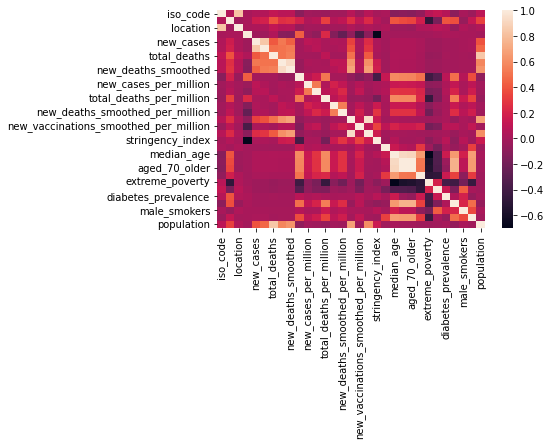

In [27]:
# Dataset copy to be use in the correlation, remove the column total_cases because it is the column we are trying to predict
X_train_data_corr = X_train.copy()

# The numpy.random.seed() makes the random numbers predictable and is used for reproducibility
np.random.seed(123)

# Find out the index for categorical variables
continent = X_train_data_corr.columns.get_loc('continent')
location = X_train_data_corr.columns.get_loc('location')
iso_code = X_train_data_corr.columns.get_loc('iso_code')
date = X_train_data_corr.columns.get_loc('date')

# Encode the Categorical Variable
# The dataset has 4 categorical attributes: date, continent, iso_code and location
label_encoder = LabelEncoder()
X_train_data_corr.iloc[:,continent] = label_encoder.fit_transform(X_train_data_corr.iloc[:,continent]).astype('float64')
X_train_data_corr.iloc[:,location] = label_encoder.fit_transform(X_train_data_corr.iloc[:,location]).astype('float64')
X_train_data_corr.iloc[:,iso_code] = label_encoder.fit_transform(X_train_data_corr.iloc[:,iso_code]).astype('float64')
X_train_data_corr.iloc[:,date] = label_encoder.fit_transform(X_train_data_corr.iloc[:,date]).astype('float64')

corr = X_train_data_corr.corr()
corr

sns.heatmap(corr)

In [28]:
# Next, compare the correlation between features and remove one of two features that have a correlation higher than 0.9

columns = np.full((corr.shape[0],), True, dtype=bool)
columns
selected_columns = X_train_data_corr.columns[columns]
selected_columns

for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False

columns
selected_columns = X_train_data_corr.columns[columns]
# selected_columns
# selected_columns.shape

selected_columns
selected_columns.shape

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

Index(['iso_code', 'continent', 'location', 'date', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'new_vaccinations_smoothed',
       'new_vaccinations_smoothed_per_million',
       'new_people_vaccinated_smoothed', 'stringency_index',
       'population_density', 'median_age', 'aged_65_older', 'aged_70_older',
       'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate',
       'diabetes_prevalence', 'female_smokers', 'male_smokers',
       'hospital_beds_per_thousand', 'population'],
      dtype='object')

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,  True,  True])

Index(['iso_code', 'continent', 'location', 'date', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'total_cases_per_million', 'new_cases_per_million',
       'new_cases_smoothed_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'new_deaths_smoothed_per_million',
       'new_vaccinations_smoothed', 'new_vaccinations_smoothed_per_million',
       'stringency_index', 'population_density', 'median_age',
       'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate',
       'diabetes_prevalence', 'female_smokers', 'male_smokers',
       'hospital_beds_per_thousand', 'population'],
      dtype='object')

(27,)

Correlation between features correlation higher than 0.9 are:
- 'new_deaths_smoothed'
- 'new_people_vaccinated_smoothed'
- 'aged_65_older'
- 'aged_70_older'

Remove the four features that have a correlation higher than 0.9

In [29]:
X_train = X_train_data_corr[selected_columns]

print("After removing features that have a correlation higher than 0.9\n")
print("Total number of observations: ", X_train.shape[0])
print("Total number of attributes: ", X_train.shape[1])
print("Size: ", X_train.size)
print("\n")
X_train.info()

After removing features that have a correlation higher than 0.9

Total number of observations:  168149
Total number of attributes:  27
Size:  4540023


<class 'pandas.core.frame.DataFrame'>
Index: 168149 entries, 150503 to 32276
Data columns (total 27 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   iso_code                               168149 non-null  object 
 1   continent                              168149 non-null  object 
 2   location                               168149 non-null  object 
 3   date                                   168149 non-null  object 
 4   new_cases                              168015 non-null  float64
 5   new_cases_smoothed                     168015 non-null  float64
 6   total_deaths                           161662 non-null  float64
 7   new_deaths                             168017 non-null  float64
 8   total_cases_per_million                1681

### Selecting columns based on p-value

Selecting the columns based on how they affect the p-value. 


In [30]:
X_train_p_value = X_train.copy()

# Take care of missing values encoded as NaN natively by replacing with the mean 

for c in X_train_p_value.columns:
    X_train_p_value[c] = X_train_p_value[c].fillna(X_train_p_value[c].mean())


In [31]:
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    #x=np.array(x, dtype=float)
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    
    return x, columns, regressor_OLS.summary()

In [32]:
SL = 0.05
data_modeled, selected_columns, summary = backwardElimination(
    X_train_p_value.iloc[:,:].values ,
    y_train.iloc[:,:].values,
    SL,
    selected_columns)


In [33]:
summary

data = pd.DataFrame(data = data_modeled, columns = selected_columns)

data.head()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.931
Model:                            OLS   Adj. R-squared (uncentered):              0.931
Method:                 Least Squares   F-statistic:                          9.817e+04
Date:                Sun, 05 Nov 2023   Prob (F-statistic):                        0.00
Time:                        22:21:17   Log-Likelihood:                     -2.9818e+06
No. Observations:              168149   AIC:                                  5.964e+06
Df Residuals:                  168126   BIC:                                  5.964e+06
Df Model:                          23                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          4.151e+04    768.406     54.025      0.000       4e+04     4.3e+04
x2         -9.556e+05   2.08e+04    -45.875      0.000   -9.96e+05   -9.15e+05
x3         -5.604e+04    775.881    -72.233      0.000   -5.76e+04   -5.45e+04
x4          2196.6182    119.115     18.441      0.000    1963.155    2430.082
x5             9.9061      0.430     23.026      0.000       9.063      10.749
x6             1.6996      0.509      3.340      0.001       0.702       2.697
x7            95.8559      0.127    755.357      0.000      95.607      96.105
x8         -8724.4505     72.062   -121.068      0.000   -8865.691   -8583.210
x9            17.2635      0.266     64.816      0.000      16.742      17.786
x10         -215.2473     43.252     -4.977      0.000    -300.021    -130.473
x11        -2184.5881     37.013    -59.022      0.000   -2257.133   -2112.043
x12         6.281e+04   6219.169     10.100      0.000    5.06e+04     7.5e+04
x13         6.284e+04   1.28e+04      4.928      0.000    3.78e+04    8.78e+04
x14           -4.8034      0.026   -183.677      0.000      -4.855      -4.752
x15           44.9545     12.563      3.578      0.000      20.330      69.579
x16         1.828e+04   1940.270      9.421      0.000    1.45e+04    2.21e+04
x17         -225.7139     23.047     -9.794      0.000    -270.885    -180.543
x18         7.764e+04   5244.366     14.805      0.000    6.74e+04    8.79e+04
x19          -23.7412      2.453     -9.678      0.000     -28.549     -18.933
x20        -1.347e+04   2205.501     -6.109      0.000   -1.78e+04   -9151.225
x21        -4257.9557    287.760    -14.797      0.000   -4821.960   -3693.952
x22         3.642e+05   1.89e+04     19.260      0.000    3.27e+05    4.01e+05
x23            0.0070   9.97e-05     70.061      0.000       0.007       0.007
==============================================================================
Omnibus:                   127137.718   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         18003914.269
Skew:                           2.828   Prob(JB):                         0.00
Kurtosis:                      53.376   Cond. No.                     5.04e+08
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.04e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

,iso_code,continent,location,date,new_cases,new_cases_smoothed,total_deaths,new_deaths,total_cases_per_million,new_cases_smoothed_per_million,...,new_vaccinations_smoothed,new_vaccinations_smoothed_per_million,stringency_index,population_density,median_age,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,hospital_beds_per_thousand,population
0,102.0,3.0,107.0,810.0,67.0,9.571,3528.0,7.0,54657.630,3.385,...,1.550000e+02,55.000000,38.777144,266.879000,31.400000,8193.571000,13.87359,206.537000,1.70000,2.827382e+06
1,143.0,3.0,135.0,110.0,0.0,124.429,66.0,0.0,26551.514,338.570,...,3.231446e+05,1897.367888,38.777144,326.282379,45.700000,18693.106291,13.87359,262.537128,3.00688,3.675120e+05
2,163.0,6.0,69.0,457.0,2956560.0,646381.857,1819629.0,4750.0,243286.033,867.851,...,5.590850e+05,751.000000,38.777144,326.282379,30.387504,18693.106291,13.87359,262.537128,3.00688,7.448078e+08
3,164.0,6.0,95.0,186.0,54690.0,79034.571,1617485.0,555.0,63677.243,63.202,...,7.606452e+06,6083.000000,38.777144,326.282379,30.387504,18693.106291,13.87359,262.537128,3.00688,1.250515e+09
4,99.0,2.0,98.0,311.0,0.0,118.143,34.0,0.0,39039.643,316.819,...,8.210000e+02,2202.000000,27.780000,3.404000,37.300000,46482.958000,0.20000,117.992000,2.91000,3.729030e+05


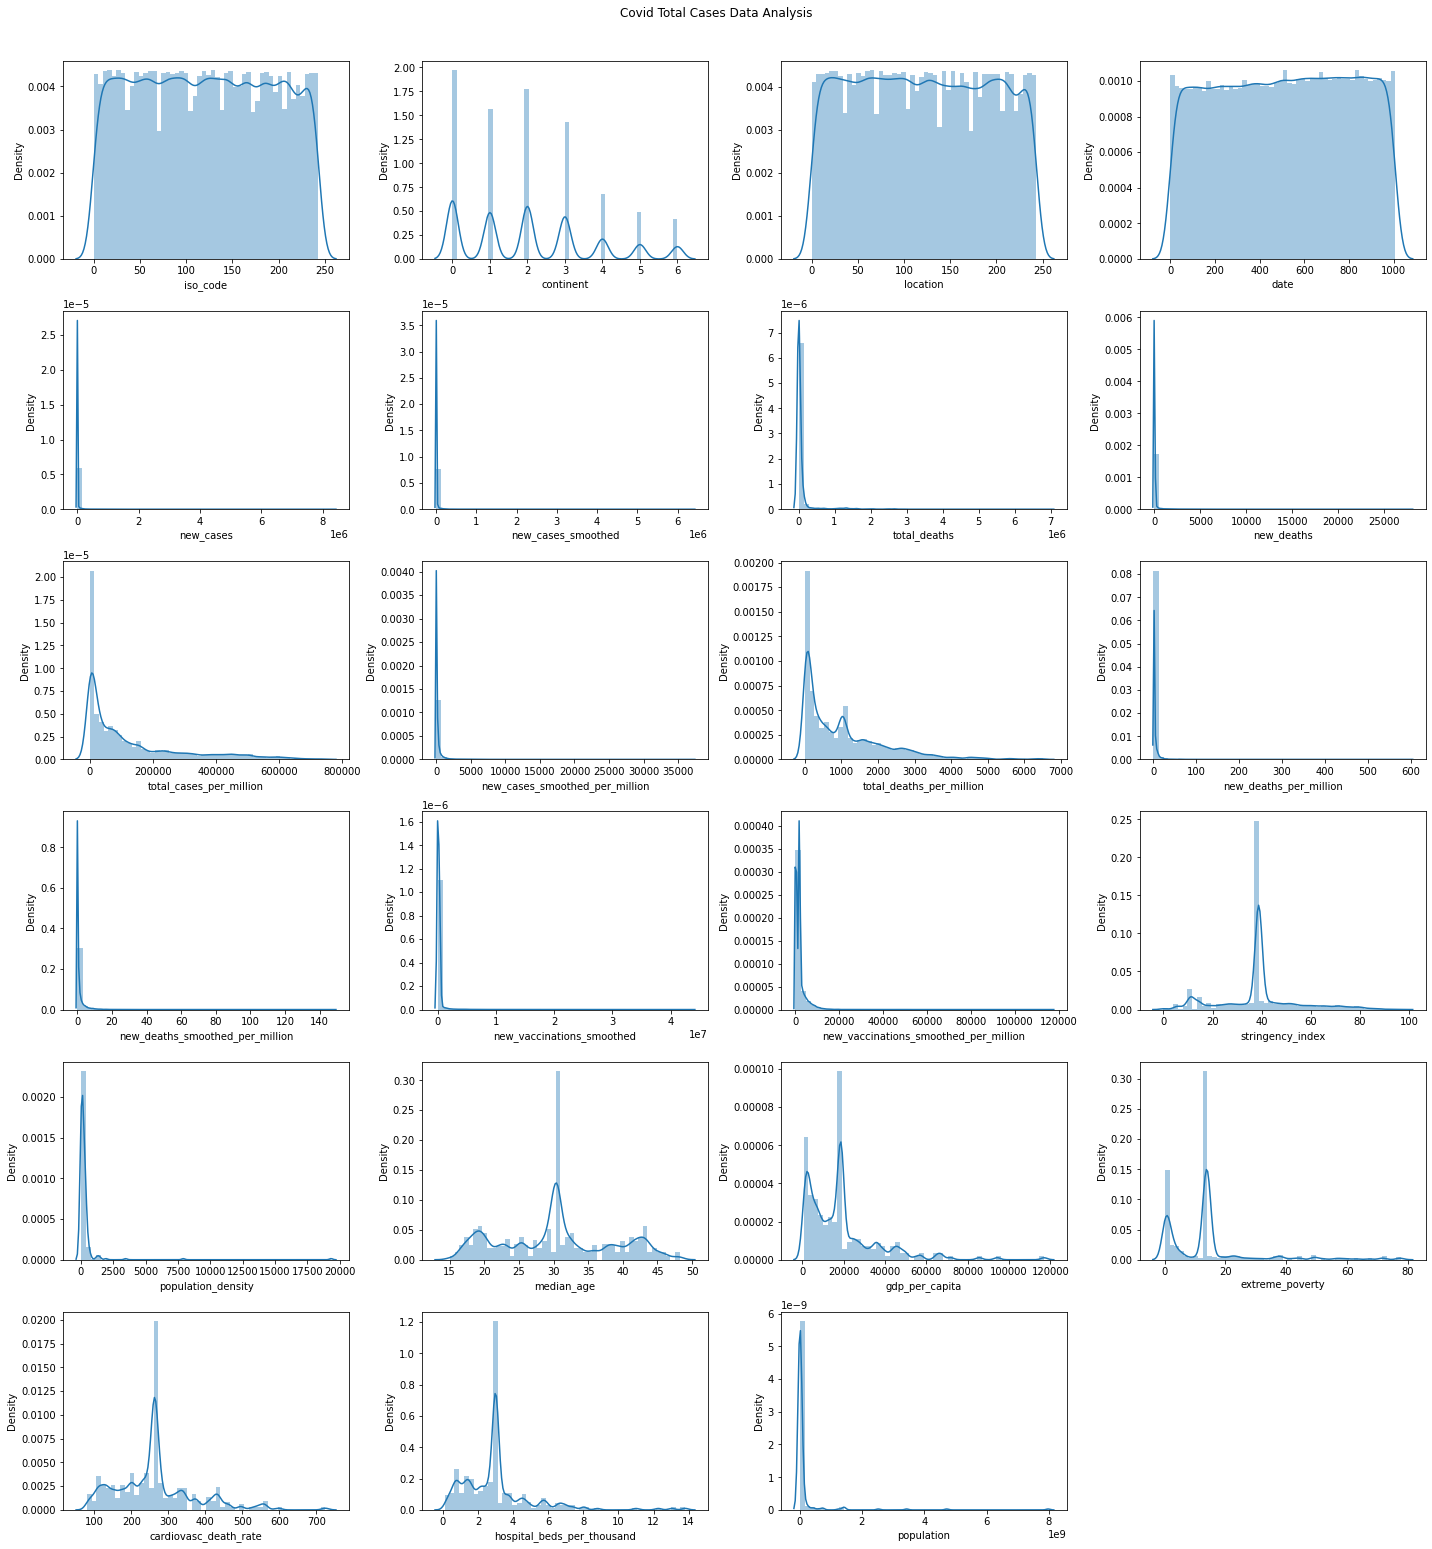

In [34]:

fig = plt.figure(figsize = (20, 25))
j = 0
for i in data.columns:
    plt.subplot(7, 4, j+1)
    j += 1
    sns.distplot(data[i])
    #plt.legend(loc='best',fontsize=10)
fig.suptitle('Covid Total Cases Data Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)


plt.show();

In [35]:
print ("After removing columns based on how they affect the p-value.:\n")
print("Total number of observations: ", data.shape[0])
print("Total number of attributes: ", data.shape[1])
print("Size: ", data.size)
print("\n")
data.info()

After removing columns based on how they affect the p-value.:

Total number of observations:  168149
Total number of attributes:  23
Size:  3867427


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168149 entries, 0 to 168148
Data columns (total 23 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   iso_code                               168149 non-null  float64
 1   continent                              168149 non-null  float64
 2   location                               168149 non-null  float64
 3   date                                   168149 non-null  float64
 4   new_cases                              168149 non-null  float64
 5   new_cases_smoothed                     168149 non-null  float64
 6   total_deaths                           168149 non-null  float64
 7   new_deaths                             168149 non-null  float64
 8   total_cases_per_million                16814

# Generate Profiling Report

In [ ]:
# Genetate profiling report
#profile = ProfileReport(data, title="Profiling Report", html={'style':{'fullwith':True}})
#profile